# Alexnet model for Image classificarion

In [1]:
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

from alexnet_base import *
from utils import *


batch_size = 16
input_size = (3,227,227)
nb_classes = 2
mean_flag = True

train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator()
                                  

train_generator = train_datagen.flow_from_directory(
        '../DATA/Train',  
        batch_size=batch_size,
        shuffle=True,
        target_size=input_size[1:],
        class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
        '../DATA/Test',  
        batch_size=batch_size,
        target_size=input_size[1:],
        shuffle=True,
        class_mode='categorical')

Using Theano backend.


Found 5312 images belonging to 2 classes.
Found 1332 images belonging to 2 classes.


In [2]:
alexnet = get_alexnet(input_size,nb_classes,mean_flag)
    
print alexnet.summary()

/home/vysakh/anaconda2/envs/theano/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer mean_subtraction and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 227, 227)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 227, 227)   0                                            
____________________________________________________________________________________________________
mean_subtraction (Lambda)        (None, 3, 227, 227)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv_1 (Convolution2D)           (None, 96, 55, 55)    34944       mean_subtraction[0][0]           
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 96, 27, 27)    0           conv_1[0][0]                     
___________________________________________________________________________________________

# Training with random weight initialization

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
alexnet.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

history = alexnet.fit_generator(train_generator,
                        samples_per_epoch=2000,
                        validation_data=validation_generator,
                        nb_val_samples=800,
                        nb_epoch=80,
                        verbose=1)

In [ ]:
plot_performance(history)

# Training with ImageNet weights

In [28]:
alexnet = get_alexnet(input_size,nb_classes,mean_flag)
#alexnet.load_weights('../convnets-keras/weights/alexnet_weights.h5', by_name=True)
alexnet.load_weights('../convnets-keras/weights/final-model.h5', by_name=True)
print alexnet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 3, 227, 227)   0                                            
____________________________________________________________________________________________________
mean_subtraction (Lambda)        (None, 3, 227, 227)   0           input_4[0][0]                    
____________________________________________________________________________________________________
conv_1 (Convolution2D)           (None, 96, 55, 55)    34944       mean_subtraction[0][0]           
____________________________________________________________________________________________________
maxpooling2d_7 (MaxPooling2D)    (None, 96, 27, 27)    0           conv_1[0][0]                     
___________________________________________________________________________________________

In [30]:
layers = ['dense_3_new','dense_2','dense_1','conv_5_1','conv_4_1','conv_3','conv_2_1','conv_1']
epochs = [10,10,10,10,10,10,10,10]
#epochs = [10]
lr = [1e-2,1e-3,1e-3,1e-3,1e-3,1e-3,1e-3,1e-3]

history_finetune = []

for i,layer in enumerate(layers):
        
    alexnet = unfreeze_layer_onwards(alexnet,layer)    
   
    sgd = SGD(lr=lr[i], decay=1e-6, momentum=0.9, nesterov=True)
    alexnet.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])
    
    for epoch in range(epochs[i]):    
        h = alexnet.fit_generator(train_generator,
                                        samples_per_epoch=2000,
                                        validation_data=validation_generator,
                                        nb_val_samples=800,
                                        nb_epoch=1,
                                        verbose=1)
        a = "logs/checkpoint-"+str(epoch)+".h5"
        alexnet.save(a)
        
        
        history_finetune = append_history(history_finetune,h)
alexnet.save("logs/final-model.h5")

Epoch 1/1
2000/2000 [==============================] - 137s - loss: 0.0105 - acc: 0.9890 - val_loss: 0.0086 - val_acc: 0.9875
Epoch 1/1
2000/2000 [==============================] - 133s - loss: 0.0096 - acc: 0.9870 - val_loss: 0.0079 - val_acc: 0.9913
Epoch 1/1
2000/2000 [==============================] - 118s - loss: 0.0106 - acc: 0.9885 - val_loss: 0.0075 - val_acc: 0.9875
Epoch 1/1
2000/2000 [==============================] - 116s - loss: 0.0107 - acc: 0.9845 - val_loss: 0.0080 - val_acc: 0.9888
Epoch 1/1
2000/2000 [==============================] - 116s - loss: 0.0128 - acc: 0.9855 - val_loss: 0.0066 - val_acc: 0.9900
Epoch 1/1
2000/2000 [==============================] - 116s - loss: 0.0103 - acc: 0.9885 - val_loss: 0.0090 - val_acc: 0.9875
Epoch 1/1
2000/2000 [==============================] - 116s - loss: 0.0080 - acc: 0.9910 - val_loss: 0.0058 - val_acc: 0.9913
Epoch 1/1
2000/2000 [==============================] - 116s - loss: 0.0090 - acc: 0.9890 - val_loss: 0.0073 - val_acc:

2000/2000 [==============================] - 231s - loss: 0.0045 - acc: 0.9955 - val_loss: 0.0071 - val_acc: 0.9900
Epoch 1/1
2000/2000 [==============================] - 243s - loss: 0.0078 - acc: 0.9915 - val_loss: 0.0032 - val_acc: 0.9963
Epoch 1/1
2000/2000 [==============================] - 225s - loss: 0.0051 - acc: 0.9945 - val_loss: 0.0066 - val_acc: 0.9912
Epoch 1/1
2000/2000 [==============================] - 222s - loss: 0.0089 - acc: 0.9885 - val_loss: 0.0066 - val_acc: 0.9925
Epoch 1/1
2000/2000 [==============================] - 215s - loss: 0.0058 - acc: 0.9935 - val_loss: 0.0060 - val_acc: 0.9938
Epoch 1/1
2000/2000 [==============================] - 251s - loss: 0.0049 - acc: 0.9955 - val_loss: 0.0136 - val_acc: 0.9838
Epoch 1/1
2000/2000 [==============================] - 269s - loss: 0.0068 - acc: 0.9915 - val_loss: 0.0043 - val_acc: 0.9950
Epoch 1/1
2000/2000 [==============================] - 277s - loss: 0.0035 - acc: 0.9965 - val_loss: 0.0063 - val_acc: 0.9912
Ep

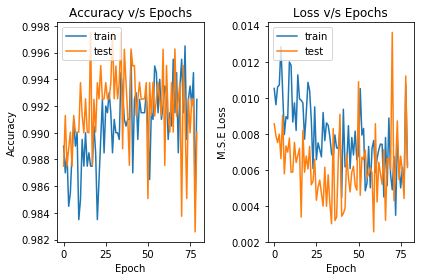

In [39]:
plot_performance(history_finetune)

In [22]:
alexnet = get_alexnet(input_size,nb_classes,mean_flag)
alexnet.load_weights('../convnets-keras/weights/checkpoint-9.h5', by_name=True)

test_generator = test_datagen.flow_from_directory(
        '../DATA/Test',  
        batch_size=100,
        target_size=input_size[1:],
        shuffle=False,
        class_mode='binary')
prob=alexnet.predict_generator(test_generator,1332)

Found 1332 images belonging to 2 classes.


# Plotting performance metrics

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
y_pred=prob>0.5
y_pred = np.argmax(prob, axis=1)
y_true=np.array([0]*666+ [1]*666)
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

    class 0       0.97      0.99      0.98       666
    class 1       0.99      0.97      0.98       666

avg / total       0.98      0.98      0.98      1332

[[662   4]
 [ 20 646]]
0.981981981982


In [20]:
# alexnet.get_layer('dense_3_new').output
# alexnet_convolutional_only = Model(input=alexnet.input, output=alexnet.get_layer('convpool_5').output)
cm=confusion_matrix(y_true, y_pred)
class_names=['Non-Vehicle','Vehicle']

# Confusion Matrix

Confusion matrix, without normalization
[[662   4]
 [ 20 646]]


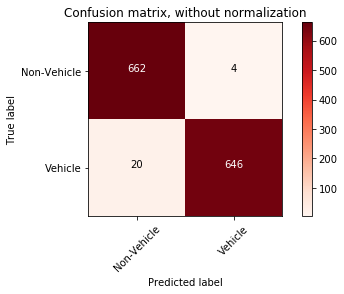

In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('plot.png')
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()


